# IMDB Movie review analysis using Logistic regression

## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
import streamlit
import wordcloud

In [2]:
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\priya\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


## Loading dataset

In [7]:
data = pd.read_csv("Movie_Review.csv")

In [8]:
data['sentiment'].value_counts()

sentiment
neg    500
pos    500
Name: count, dtype: int64

In [10]:
data.dropna(inplace=True)
data

,text,sentiment
0,"My daughter liked it but I was aghast, that a ...",neg
1,I... No words. No words can describe this. I w...,neg
2,this film is basically a poor take on the old ...,neg
3,"This is a terrible movie, and I'm not even sur...",neg
4,First of all this movie is a piece of reality ...,pos
...,...,...
995,"""Campfire Tales"" is basically made up of three...",pos
996,I just saw this film at the phoenix film festi...,pos
997,It's out of question that the real Anna Anders...,pos
998,Michelle Pfeiffer stars as a mob widow who see...,pos


## Pre-processing the reviews

### Removing stop words

In [12]:
def clean_review(review):
    str=' '.join(word for word in review.split() if word.lower() not in stopwords.words('english'))
    return str

In [15]:
#data_cleaned=clean_review()
data["text"][0]

'My daughter liked it but I was aghast, that a character in this movie smokes. As if it isn\'t awful enough to see "product placement" actors like Bruce Willis who smoke in their movies - at least children movies should be more considerate! I wonder: was that intentional? Did big tobacco "sponsor" the film? What does it take to ban smoking from films? At least films intended for children and adolescents. My daughter liked it but I was aghast, that a character in this movie smokes. As if it isn\'t awful enough to see "product placement" actors like Bruce Willis who smoke in their movies - at least children movies should be more considerate! I wonder: was that intentional? Did big tobacco "sponsor" the film? What does it take to ban smoking from films? At least films intended for children and adolescents.'

In [16]:
clean_review(data["text"][0])

'daughter liked aghast, character movie smokes. awful enough see "product placement" actors like Bruce Willis smoke movies - least children movies considerate! wonder: intentional? big tobacco "sponsor" film? take ban smoking films? least films intended children adolescents. daughter liked aghast, character movie smokes. awful enough see "product placement" actors like Bruce Willis smoke movies - least children movies considerate! wonder: intentional? big tobacco "sponsor" film? take ban smoking films? least films intended children adolescents.'

In [55]:
data_cleaned['text']=data['text'].apply(clean_review)
data_cleaned=pd.concat([data_cleaned ,data["sentiment"]],axis=1)
data_cleaned.head()

,text,sentiment,sentiment
0,"daughter liked aghast, character movie smokes....",neg,neg
1,I... words. words describe this. try sake brav...,neg,neg
2,film basically poor take old urban legend baby...,neg,neg
3,"terrible movie, I'm even sure terrible. ugly, ...",neg,neg
4,First movie piece reality well realized artist...,pos,pos


In [58]:
data_cleaned['sentiment']=data['sentiment']
data_cleaned.head()

,text,sentiment
0,"daughter liked aghast, character movie smokes....",neg
1,I... words. words describe this. try sake brav...,neg
2,film basically poor take old urban legend baby...,neg
3,"terrible movie, I'm even sure terrible. ugly, ...",neg
4,First movie piece reality well realized artist...,pos


### Creating wordcloud

In [22]:
from wordcloud import WordCloud

In [59]:
# Collecting all the words present in negative reviews
neg_words = ' '.join(word for word in data_cleaned['text'][data_cleaned['sentiment']=='neg'].astype(str))
pos_words = ' '.join(word for word in data_cleaned['text'][data_cleaned['sentiment']=='pos'].astype(str))

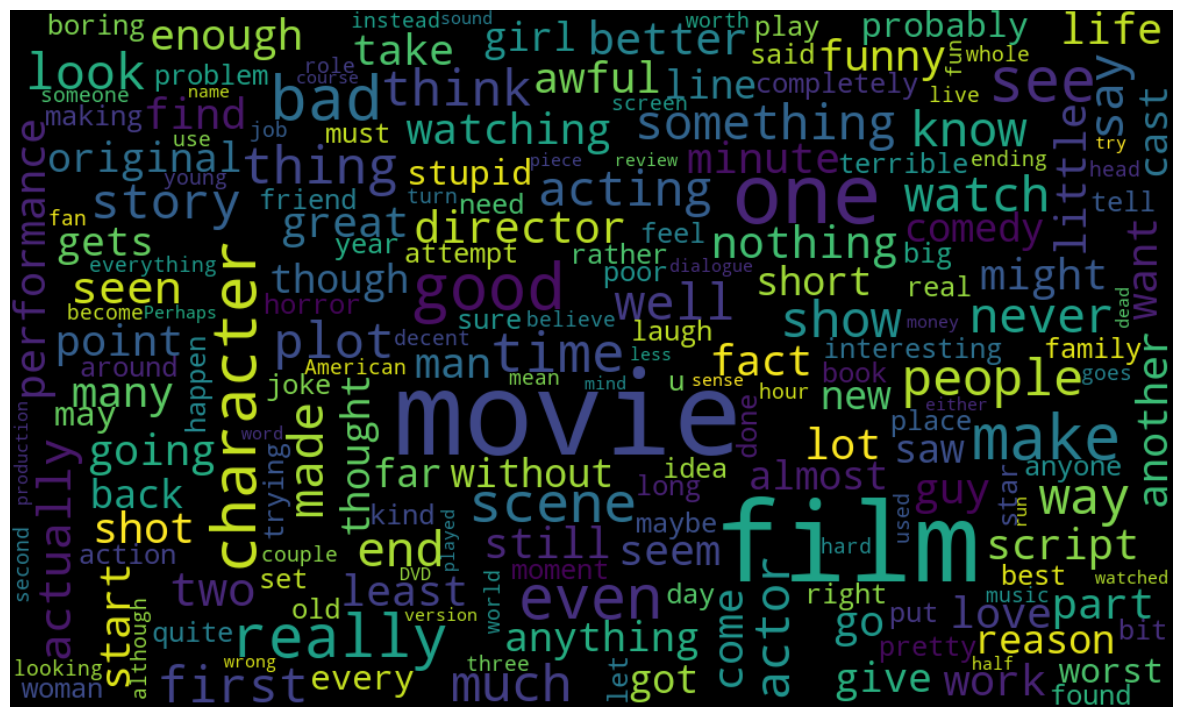

In [62]:
wordcloud=WordCloud(height=600,width=1000,max_font_size=100)
plt.figure(figsize=(15,12))
plt.imshow(wordcloud.generate(neg_words), interpolation='bilinear')
plt.axis('off')
plt.show()

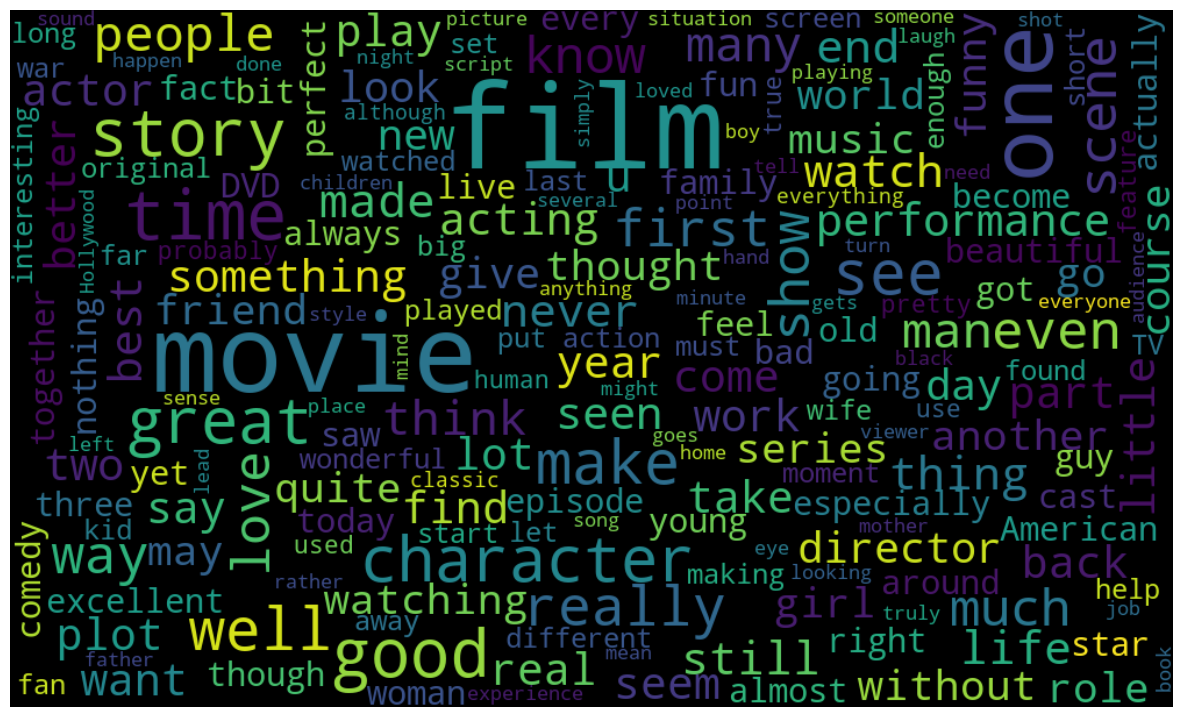

In [63]:
plt.figure(figsize=(15,12))
plt.imshow(wordcloud.generate(pos_words), interpolation='bilinear')
plt.axis('off')
plt.show()

### Vectorisation
aim : converting text data to numerical data

In [131]:
# !pip install sklearn.feature_extraction
from sklearn.feature_extraction.text import TfidfVectorizer
cv=TfidfVectorizer(max_features=1800)
reviews=cv.fit_transform(data_cleaned['text']).toarray()

In [132]:
print(reviews.shape)

(1000, 1800)


In [93]:
data_cleaned['sentiment']=data_cleaned['sentiment'].replace(['pos', 'neg'],[1, 0])
data_cleaned.head()

,text,sentiment
0,"daughter liked aghast, character movie smokes....",0
1,I... words. words describe this. try sake brav...,0
2,film basically poor take old urban legend baby...,0
3,"terrible movie, I'm even sure terrible. ugly, ...",0
4,First movie piece reality well realized artist...,1


## Model Training

In [71]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [133]:
model=LogisticRegression()
x=reviews
y=data_cleaned["sentiment"]

In [134]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
print(x_train.shape)

(800, 1800)


In [135]:
model.fit(x_train,y_train)

LogisticRegression()

## Predictions

In [136]:
y_hat=model.predict(x_test)

### Evaluation of model

In [79]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,accuracy_score

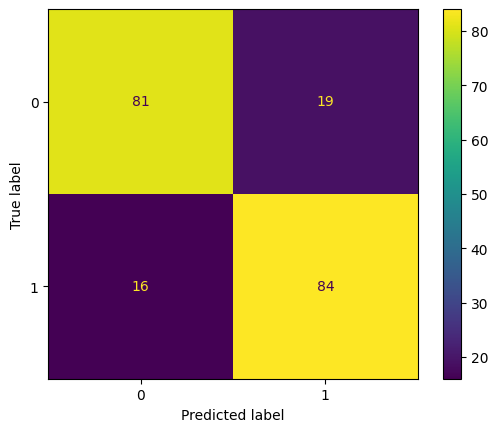

In [137]:
cm=confusion_matrix(y_test,y_hat,labels=model.classes_)
display=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
display.plot()
plt.show()

In [138]:
test_accuracy = accuracy_score(y_test, y_hat)
print("Test Accuracy:", test_accuracy*100)

y_train_hat=model.predict(x_train)
train_accuracy = accuracy_score(y_train, y_train_hat)
print("Train Accuracy:", train_accuracy*100)

Test Accuracy: 82.5
Train Accuracy: 97.125


In [139]:
import pickle as pk
pk.dump(model, open('model.pk1','wb'))

In [140]:
pk.dump(cv, open('scaler.pk1','wb'))